# Tarea Nro. 2 - PANDAS

- Nombre y Apellido: Carlos Andrés Castillo Girón
- Fecha: 23-11-2019  

En esta tarea se examinara datos de terremotos. Comience importando pandas, numpy y matplolib.

Los datos de los terremotos están localizados en usgs_terremotos_2014.csv. Ni siquiera necesita descargalo, puede abrilo directamente con Pandas.

A continuación resuelva los siguientes items. 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import us

### 1) Use la función read_csv de Pandas directamente en esta url para abrirla como un DataFrame

(No use ninguna opción especial). Mostrar las primeras filas y la información del marco de datos.
Debería haber visto que las fechas no se analizaron automáticamente en tipos de fecha y hora.

In [18]:
data = pd.read_csv('usgs_terremotos_2014.csv',sep=',')
data.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 2) Vuelva a leer los datos de tal manera que todas las columnas de fechas se identifiquen como fechas y la identificación del terremoto se use como índice

In [19]:
df = pd.read_csv('usgs_terremotos_2014.csv',parse_dates=['time'], index_col='id',sep=',')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


### 3) Obtener las estadísticas básicas de todas las columnas

In [20]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,120108.0,38.399579,21.938258,-73.4620,34.228917,38.80530,53.8895,86.6514
longitude,120108.0,-99.961402,82.996858,-179.9989,-147.742025,-120.83200,-116.0681,179.9980
depth,120107.0,28.375029,62.215416,-9.9000,4.100000,9.20000,22.8800,697.3600
mag,120065.0,1.793958,1.343466,-0.9700,0.820000,1.40000,2.4000,8.2000
nst,59688.0,17.878284,14.911369,0.0000,8.000000,14.00000,22.0000,365.0000
gap,94935.0,124.048978,68.518595,9.0000,74.000000,107.00000,155.0000,356.4000
dmin,85682.0,0.893198,2.903966,0.0000,0.020760,0.07367,0.4470,64.4980
rms,119716.0,0.358174,0.364046,0.0000,0.070000,0.20000,0.5900,8.4600


### 4) Obtener los 20 terremotos más importantes por magnitud

Examina la estructura de la columna `place`. La información del país parece estar allí. ¿Cómo lo sacarías?

In [21]:
df.sort_values(by='mag', ascending=False).iloc[0:20]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
usc000nzvd,2014-04-01 23:46:47.260,-19.6097,-70.7691,25.00,8.2,mww,NaN,23.0,0.609,0.66,us,2015-07-30T16:24:51.223Z,"94km NW of Iquique, Chile",earthquake
usc000rki5,2014-06-23 20:53:09.700,51.8486,178.7352,109.00,7.9,mww,NaN,22.0,0.133,0.71,us,2015-04-18T21:54:08.699Z,"19km SE of Little Sitkin Island, Alaska",earthquake
usc000p27i,2014-04-03 02:43:13.110,-20.5709,-70.4931,22.40,7.7,mww,NaN,44.0,1.029,0.82,us,2015-06-06T07:31:05.755Z,"53km SW of Iquique, Chile",earthquake
usc000phx5,2014-04-12 20:14:39.300,-11.2701,162.1481,22.56,7.6,mww,NaN,13.0,2.828,0.71,us,2015-04-18T21:54:27.398Z,"93km SSE of Kirakira, Solomon Islands",earthquake
usb000pr89,2014-04-19 13:28:00.810,-6.7547,155.0241,43.37,7.5,mww,NaN,16.0,3.820,1.25,us,2015-04-18T21:54:18.633Z,"70km SW of Panguna, Papua New Guinea",earthquake
usc000piqj,2014-04-13 12:36:19.230,-11.4633,162.0511,39.00,7.4,mww,NaN,17.0,2.885,1.00,us,2015-08-13T19:29:13.018Z,"112km S of Kirakira, Solomon Islands",earthquake
usb000slwn,2014-10-14 03:51:34.460,12.5262,-88.1225,40.00,7.3,mww,NaN,18.0,1.078,0.70,us,2015-08-13T19:35:02.679Z,"74km S of Intipuca, El Salvador",earthquake
usb000pq41,2014-04-18 14:27:24.920,17.3970,-100.9723,24.00,7.2,mww,NaN,46.0,2.250,1.20,us,2015-08-13T19:30:39.599Z,"33km ESE of Petatlan, Mexico",earthquake
usc000pft9,2014-04-11 07:07:23.130,-6.5858,155.0485,60.53,7.1,mww,NaN,21.0,3.729,0.88,us,2014-07-01T02:37:56.000Z,"56km WSW of Panguna, Papua New Guinea",earthquake


### 5) Extraiga el país utilizando las funciones de datos de texto de Pandas 

Agréguelo como una nueva columna al dataframe. (¿Es realmente solo un país? No, algunas filas tienen el nombre de un estado de EE. UU.) Corrija esto https://www.geeksforgeeks.org/python-pandas-working-with-text-data/. 

Otra librería que puede ser útil https://pypi.org/project/us/ para identificar si es un estado de EEUU es `us`



In [22]:
# Metodo que permite establecer el pais de cada 'place'
def setCountry(x):
#En algunos casos la columna 'place' solo tiene el nombre del pais y en otros casos, 
#contiene el estado y el pais
    
    place = x.split(', ') # Devuelve una lista 
    if (len(place) == 1): 
        # Como por ejemplo cuando el estado es 'offshore Northern California' 
        # le hacemos un nuevo split y se le evia la ultima posicion
        x = validateState(place[0].split(' ')[-1])
    elif (len(place) == 2):
        x = validateState(place[1])
    elif (len(place) == 3):
        x = validateState(place[2])
    elif (len(place) == 4):
        x = validateState(place[3])
    else:
        x = validateState(place[4])
    return x

# Metodo que permite validar si es un estado de 'EE.UU'
def validateState(x):
    for i in us.states.STATES_AND_TERRITORIES:
        if x.lower() == str(i).lower():
            x = 'EE.UU'
            return x
    return x
                
    

In [23]:
df['country'] = df['place'].apply(setCountry)
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,EE.UU
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,EE.UU
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,EE.UU
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,EE.UU
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,Mexico


### 6) Encuentra los 10 países con el mayor número de terremotos

In [24]:
df['country'].value_counts().iloc[0:10]

EE.UU               101228
Indonesia             2124
Papua New Guinea      1356
Chile                 1196
Japan                 1150
Canada                 766
New Zealand            762
Philippines            749
Mexico                 678
Ridge                  672
Name: country, dtype: int64

### 7) Encuentra los 10 principales países donde ocurrieron los terremotos más fuertes y más débiles

 

In [25]:
print('\nPAISES CON LOS TERREMOTOS MAS FUERTES')
df.sort_values(by='mag', ascending=False).iloc[0:10].loc[:, ['country', 'mag']]


PAISES CON LOS TERREMOTOS MAS FUERTES


,country,mag
id,,
usc000nzvd,Chile,8.2
usc000rki5,EE.UU,7.9
usc000p27i,Chile,7.7
usc000phx5,Solomon Islands,7.6
usb000pr89,Papua New Guinea,7.5
usc000piqj,Solomon Islands,7.4
usb000slwn,El Salvador,7.3
usb000pq41,Mexico,7.2
usc000pft9,Papua New Guinea,7.1


In [26]:
auxDf = df # creamos una copia de la data para no afectar el original

# Eliminamos datos repetidos de la columna 'country' 
auxDf.drop_duplicates('country', keep="last", inplace=True) 
print('\nPAISES CON LOS TERREMOTOS MAS DÉBILES')
auxDf.sort_values(by='mag', ascending=True).iloc[0:10].loc[:, ['country', 'mag']]


PAISES CON LOS TERREMOTOS MAS DÉBILES


,country,mag
id,,
mb15443691,Africa,0.0
mb15070443,Sierra Leone,0.0
nc72290341,CA,1.1
ak11386242,Peninsula,1.4
ci11412602,CUSHENBURY,1.4
ci11413778,VICTORVILLE,1.5
ci11413530,BORON,1.5
ak11453389,EE.UU,1.6
ak11461189,Canada,1.9


### 8) Cree un conjunto de datos filtrado que solo tenga terremotos de magnitud 4 o mayores 


In [27]:
dfEarthquakes = df[df.mag >= 4]
dfEarthquakes.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
usc000mmzj,2014-01-26 06:20:21.280,2.2486,18.8691,9.66,4.2,mb,NaN,70.0,12.200,1.07,us,2014-03-27T18:15:41.000Z,"111km NE of Impfondo, Republic of the Congo",earthquake,Republic of the Congo
usb000m402,2014-01-19 01:34:34.000,48.0527,19.3481,3.10,4.0,mwr,NaN,119.0,0.390,0.72,us,2014-03-22T00:05:22.000Z,"4km ESE of Balassagyarmat, Hungary",earthquake,Hungary
usc000n4ze,2014-02-26 13:19:48.090,15.0306,-24.4873,11.37,4.3,mb,NaN,300.0,0.851,1.14,us,2014-05-13T21:36:42.000Z,"14km N of Sao Filipe, Cape Verde",earthquake,Cape Verde
usc000mxt4,2014-02-25 15:43:31.900,-59.4033,-59.9734,15.01,5.1,mb,NaN,89.0,5.719,0.86,us,2014-05-07T00:03:11.000Z,Drake Passage,earthquake,Passage
usb000my8j,2014-02-15 07:47:55.840,-11.3042,-166.8261,16.72,4.5,mb,NaN,168.0,5.482,0.78,us,2014-04-30T21:18:21.000Z,"118km WSW of Pukapuka, Cook Islands",earthquake,Cook Islands


### 9) Analice la distribución de las magnitudes del terremoto en la distribución filtrada
Haga un histograma del conteo del terremoto versus la magnitud. Asegúrese de usar una escala logarítmica.


In [31]:
magnitude = dfEarthquakes.mag.dropna() # limpiamos los datos inexistentes
plt.figure(figsize=(20,7))
# 'edgecolor' permite mostrar las lineas de cada barra
plt.hist(magnitude,bins=sorted(magnitude.unique()), color="#A68830",alpha=1, edgecolor = 'black',  linewidth=1)
plt.yscale('log')
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.show()

id
usc000mmzj    4.2
usb000m402    4.0
usc000n4ze    4.3
usc000mxt4    5.1
usb000my8j    4.5
             ... 
usc000t6yf    4.1
usc000t6y2    4.3
usc000t6y1    4.3
usb000t1gp    4.2
usc000t6yn    4.5
Name: mag, Length: 157, dtype: float64

### 10) Visualice la ubicación de los terremotos haciendo un diagrama de dispersión de su latitud y longitud.

#### Usa los datos filtrados. Coloréalo por magnitud.



Ej. plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)

Con s y c podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un mapa de colores; ese mapa se puede cambiar con el argumento cmap. Esa correspondencia se puede visualizar llamando a la función colorbar.

```

N = 100
x = np.random.randn(N)
y = np.random.randn(N)
s = 50 + 50 * np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()

```
Ref. adicional para colores: https://github.com/lsantiago/PythonBasico/raw/d36d9571a1ff6a2df8364a9055f71d70eddd9151/NumpyMatplotlib/plot_colormaps.png


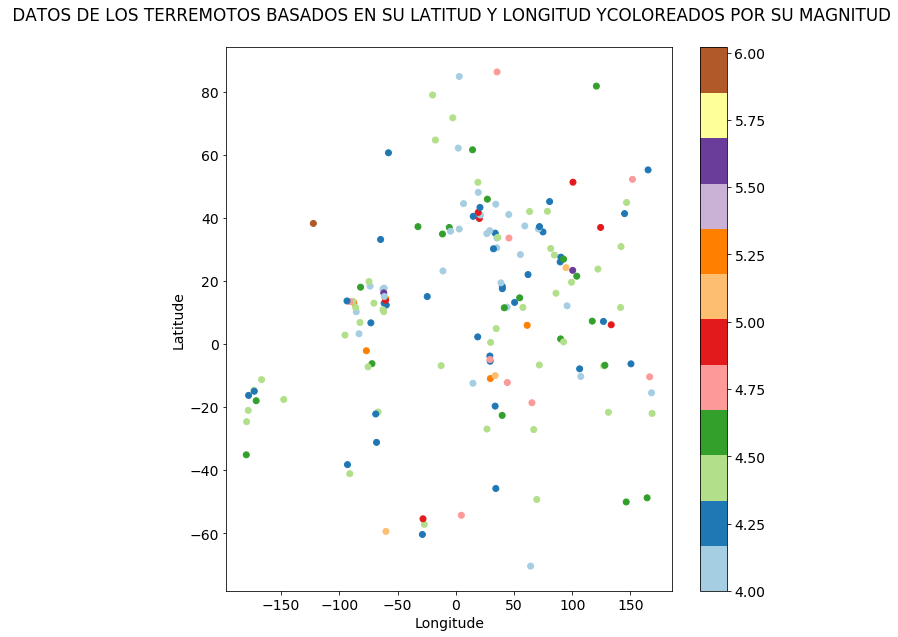

In [29]:
plt.figure(figsize=(10,10)) # tamaño de la figura
x = dfEarthquakes.longitude # eje x
y = dfEarthquakes.latitude # eje y
c=dfEarthquakes.mag # cantidad de colores
plt.rcParams["font.size"] = 14 # tamaño de la letra
plt.scatter(x, y,c=c,cmap=plt.cm.Paired) # Creamos la figura
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(' DATOS DE LOS TERREMOTOS BASADOS EN SU LATITUD Y LONGITUD Y'+ 
          'COLOREADOS POR SU MAGNITUD\n')
plt.colorbar() # lanzamos la figura

### 11) Haz lo mismo para la profundidad 

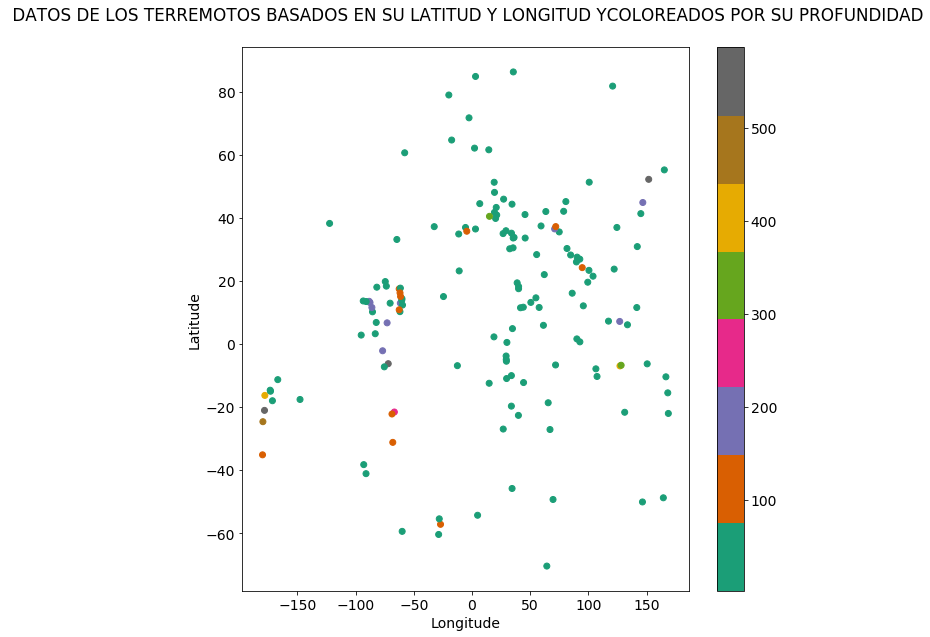

In [30]:
plt.figure(figsize=(10,10)) # tamaño de la figura
x = dfEarthquakes.longitude # eje x
y = dfEarthquakes.latitude # eje y
c=dfEarthquakes.depth # cantidad de colores
plt.rcParams["font.size"] = 14 # tamaño de la letra
plt.scatter(x, y,c=c,cmap=plt.cm.Dark2) # Creamos la figura
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(' DATOS DE LOS TERREMOTOS BASADOS EN SU LATITUD Y LONGITUD Y'+ 
          'COLOREADOS POR SU PROFUNDIDAD\n')
plt.colorbar() # lanzamos la figura